In [1]:
# univariate lstm example 
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten

Univariate Time Series Forecasting

Sales made by company on a daily basis:
[110, 125, 133, 146, 158, 172, 187, 196, 210]

Considering past 3-day sales, we want to predict the 10th day's sales and then forecast the next 10 days after the 9th day.

Data Preprocessing
X (Past 3 Days)	y (Next Day)
110, 125, 133	146
125, 133, 146	158
133, 146, 158	172
146, 158, 172	187
158, 172, 187	196
172, 187, 196	210
Our focus is on predicting:
X = [187, 196, 210] → y = ?

We will now run a simple LSTM RNN model to predict the next 10 days of sales.

In [2]:
# define input sequence 
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps 
n_steps = 3

In [3]:
# preparring independent and dependent features

def prepare_data(timeseries_data, n_features):
    X, y = [],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern 
        end_ix = i + n_features
        # check if we are beyond the sequence 
        if end_ix > len(timeseries_data)-1:
            break

        #gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y) 

In [4]:
# Splitting into samples 
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [6]:
y

array([146, 158, 172, 187, 196, 210])

Whenever you are implementing LSTM you need to reshape your data into 3 dimensions 

The dimensions: 
No. of records

No. of time stamps 

No. of features

In [7]:
X.shape

(6, 3)

In [8]:
# reshape from [samples/records, timesteps] into [samples, timesteps, features]

n_features = 1 # just to reshape into 3 dim
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
X.shape

(6, 3, 1)

# Building LSTM model 


In [10]:
# define model 
model = Sequential() # defines the lstm models architecture 
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X,y, epochs=300, verbose=1)


Epoch 1/300


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step - loss: 31975.3066
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31840.1504
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 31709.4219
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 31579.9980
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 31450.0938
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31319.6172
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 31187.9453
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31053.4707
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 30915.3223
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30772.8184
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30625.4199
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30472.6738
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30314.1309
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 30149.3125
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

# Predicting for the next 10 days 

In [11]:
x_input = np.array([187,196,210])
temp_input = list(x_input)
lst_output=[]

In [12]:
i = 0
while(i < 10):  # Predict next 10 days
    if(len(temp_input) > 3):
        x_input = np.array(temp_input[-3:])  # Always take last 3 elements
        print("{} day input {}".format(i, x_input))

        x_input = x_input.reshape((1, n_steps, n_features))  # Reshape for LSTM
        yhat = model.predict(x_input, verbose=0)  # Predict next value

        print("{} day output {}".format(i, yhat))
        
        temp_input.append(yhat[0][0])  # Add new predicted value
        temp_input = temp_input[1:]  # Maintain rolling window

        lst_output.append(yhat[0][0])  # Store predictions

    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])

    i = i + 1  # Move to next day

print(lst_output)  # Print predicted 10 days


1 day input [196.         210.         224.99934387]
1 day output [[236.82584]]
2 day input [210.         224.99934387 236.82583618]
2 day output [[251.55103]]
3 day input [224.99934 236.82584 251.55103]
3 day output [[266.23447]]
4 day input [236.82584 251.55103 266.23447]
4 day output [[280.1473]]
5 day input [251.55103 266.23447 280.1473 ]
5 day output [[295.7044]]
6 day input [266.23447 280.1473  295.7044 ]
6 day output [[311.27628]]
7 day input [280.1473  295.7044  311.27628]
7 day output [[327.06845]]
8 day input [295.7044  311.27628 327.06845]
8 day output [[343.9278]]
9 day input [311.27628 327.06845 343.9278 ]
9 day output [[361.09674]]
[224.99934, 236.82584, 251.55103, 266.23447, 280.1473, 295.7044, 311.27628, 327.06845, 343.9278, 361.09674]


In [13]:
lst_output

[224.99934,
 236.82584,
 251.55103,
 266.23447,
 280.1473,
 295.7044,
 311.27628,
 327.06845,
 343.9278,
 361.09674]

# Visualizing the Output

In [14]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

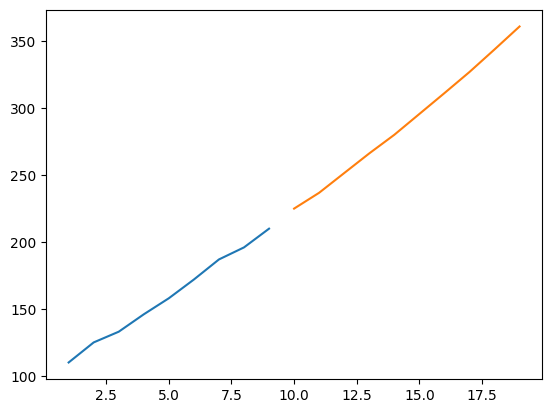

In [15]:
import matplotlib.pyplot as plt 
plt.plot(day_new, timeseries_data)
plt.plot(day_pred,lst_output)